In [ ]:
!pip install -U datasets ipywidgets together --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.8/139.8 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 27.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 36.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==202

In [ ]:
pip install fsspec==2024.9.0

In [ ]:
import datasets
import os
import requests
from google.colab import userdata, output
from ipywidgets import widgets
from together import Together
from typing import Any, Dict

output.enable_custom_widget_manager()

In [ ]:
# TRACK_OPTIONS is a "dictionary" that maps certain values to other values. In
# this case, our dictionary below maps the names of the Datathon tracks (e.g.,
# Medication Eduction) to the ID of the dataset in the Datathon (e.g., meded).
TRACK_OPTIONS = {
    "Medical Education": "meded",
    "Clinical Documentation": "clindoc",
    "Mental Health": "mentalhealth"
}

# TRACK is a variable that stores what track you and your team will be
# participating in.
TRACK = list(TRACK_OPTIONS.keys())[0]

# We'll create a user-friendly widget for your to be able to select your
# track that you're participating in. We create this widget using the
# Dropdown object from the `widgets` package.
track_selection = widgets.Dropdown(
    options=TRACK_OPTIONS.keys(),
    description="Track:",
    value=TRACK
)

# This is a helper function that we'll use to update the value of the
# TRACK variable depending on what you select from the dropdown widget.
# No need to look too closely at this function.
def on_change(change: Dict[str, Any]) -> None:
    global TRACK
    if change["type"] == "change" and change["name"] == "value":
        TRACK = change["new"]
    return

# Here, we're telling Dropdown widget to update the TRACK variable depending
# on the widget value.
track_selection.observe(on_change)

# Use the widget to select your Datathon track!
display(track_selection)

Dropdown(description='Track:', options=('Medical Education', 'Clinical Documentation', 'Mental Health'), value…

In [ ]:
# You might get a warning about the `HF_TOKEN` not existing in your Colab
# secrets. Don't worry about this for now for the purposes of this tutorial!
ds = datasets.load_dataset("mdplus/Datathon2024", data_dir=TRACK_OPTIONS[TRACK])
df_train = ds["train"].to_pandas()
df_test = ds["test"].to_pandas()

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/4.31k [00:00<?, ?B/s]

meded/med_qa_train.jsonl:   0%|          | 0.00/10.4M [00:00<?, ?B/s]

meded/med_qa_test.jsonl:   0%|          | 0.00/1.33M [00:00<?, ?B/s]

Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
df_train.head()

,question,answer,options,meta_info,answer_idx
0,A 23-year-old pregnant woman at 22 weeks gesta...,Nitrofurantoin,"{'A': 'Ampicillin', 'B': 'Ceftriaxone', 'C': '...",step2&3,E
1,A 3-month-old baby died suddenly at night whil...,Placing the infant in a supine position on a f...,{'A': 'Placing the infant in a supine position...,step2&3,A
2,A mother brings her 3-week-old infant to the p...,Abnormal migration of ventral pancreatic bud,{'A': 'Abnormal migration of ventral pancreati...,step1,A
3,A pulmonary autopsy specimen from a 58-year-ol...,Thromboembolism,"{'A': 'Thromboembolism', 'B': 'Pulmonary ische...",step1,A
4,A 20-year-old woman presents with menorrhagia ...,Von Willebrand disease,"{'A': 'Factor V Leiden', 'B': 'Hemophilia A', ...",step1,E


In [ ]:
df_train.meta_info.value_counts()

,count
meta_info,
step1,5629
step2&3,4549


In [ ]:
def extract_age(text):
    match_week = re.search(r'\b(\d+)-week-old\b', text)
    if match_week:
        return round(int(match_week.group(1)) / 52, 2)
    match_month = re.search(r'\b(\d+)-month-old\b', text)
    if match_month:
        return round(int(match_month.group(1)) / 12, 2)
    match_year = re.search(r'\b(\d+)-year-old\b', text)
    if match_year:
        return int(match_year.group(1))
    return None

def extract_gender(text):
    if any(term in text.lower() for term in ['woman', 'female', 'girl']):
        return 'Female'
    elif any(term in text.lower() for term in ['man', 'male', 'boy']):
        return 'Male'
    else:
        return None

In [ ]:
import re
df_train['Age'] = df_train['question'].apply(extract_age)
df_train['Gender'] = df_train['question'].apply(extract_gender)

In [ ]:
os.environ["TOGETHER_API_KEY"] = userdata.get("TOGETHER_API_KEY")

In [ ]:
llm_client = Together()

In [ ]:
modelID = "meta-llama/Meta-Llama-3.1-8B-Instruct-Turbo"
def get_answer(row):
    question = row['question']
    option = row['options']
    content = (
        question + "\n\n" +
        "\n".join([f"{key}: {value}" for key, value in option.items()]) +
        "\n\nselect the right answer and only give the answer index, i.e., A, B, C, D, E"
    )
    try:
        completion = llm_client.chat.completions.create(
            model=modelID,
            messages=[{
                "role": "user",
                "content": content
            }],
        )
        return completion.choices[0].message.content
    except Exception as e:
        return f"Error: {e}"
df_train['LLM_Answer'] = df_train.apply(get_answer, axis = 1)

KeyboardInterrupt: 

In [ ]:
from google.colab import files

uploaded = files.upload()

import io
import pandas as pd

df_4 = pd.read_csv(io.BytesIO(uploaded['data4.csv']))
df_4.head()

Saving data4.csv to data4.csv


,question,answer,options,meta_info,answer_idx,Age,Gender,Race,LLM_Answer,correct
0,A 23-year-old pregnant woman at 22 weeks gesta...,Nitrofurantoin,"{'A': 'Ampicillin', 'B': 'Ceftriaxone', 'C': '...",step2&3,E,23.00,Female,Other/Unknown,E,1
1,A 3-month-old baby died suddenly at night whil...,Placing the infant in a supine position on a f...,{'A': 'Placing the infant in a supine position...,step2&3,A,0.25,NaN,Other/Unknown,A,1
2,A mother brings her 3-week-old infant to the p...,Abnormal migration of ventral pancreatic bud,{'A': 'Abnormal migration of ventral pancreati...,step1,A,0.06,NaN,Other/Unknown,A,1
3,A pulmonary autopsy specimen from a 58-year-ol...,Thromboembolism,"{'A': 'Thromboembolism', 'B': 'Pulmonary ische...",step1,A,58.00,Female,Other/Unknown,A,1
4,A 20-year-old woman presents with menorrhagia ...,Von Willebrand disease,"{'A': 'Factor V Leiden', 'B': 'Hemophilia A', ...",step1,E,20.00,Female,Other/Unknown,E,1


In [ ]:
def categorize_age(num):
    if num < 3:
        return "Toddler"
    elif 3 <= num < 18:
        return "Child"
    elif 18 <= num < 60:
        return "Adult"
    else:
        return "Senior"

In [ ]:
df_4['Age_Category'] = df_4['Age'].apply(categorize_age)

NameError: name 'df_4' is not defined

In [ ]:
df_3['Age_Category'] = df_3['Age'].apply(categorize_age)

In [ ]:
df_2['Age_Category'] = df_2['Age'].apply(categorize_age)

In [ ]:
df_1['Age_Category'] = df_1['Age'].apply(categorize_age)

In [ ]:
df_1['Prompt ID'] = 'Prompt 1'
df_2['Prompt ID'] = 'Prompt 2'
df_3['Prompt ID'] = 'Prompt 3'
df_4['Prompt ID'] = 'Prompt 4'
df_full = pd.concat([df_1, df_2, df_3, df_4], ignore_index=True)

In [ ]:
df_full['correct'] = (df_full['LLM_Answer'] == df_full['answer_idx']).astype(int)


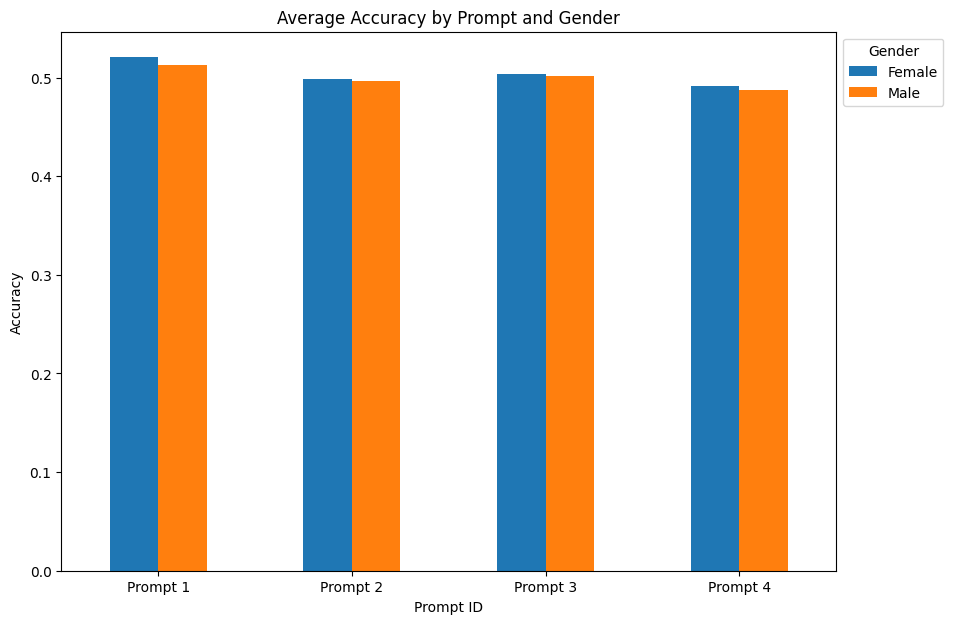

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
grouped_accuracy = df_full.groupby(['Prompt ID', 'Gender'])['correct'].mean().reset_index()
pivot_table = pd.pivot_table(grouped_accuracy, values='correct', index='Prompt ID', columns='Gender')
fig, ax = plt.subplots(figsize=(10, 7))
pivot_table.plot(kind='bar', ax=ax)
ax.set_title('Average Accuracy by Prompt and Gender')
ax.set_xlabel('Prompt ID')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.show()


<ipython-input-67-cc689eed63e8>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_accuracy = df_full.groupby(['Prompt ID', 'Age_Category'])['correct'].mean().reset_index()
<ipython-input-67-cc689eed63e8>:5: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table = pd.pivot_table(grouped_accuracy, values='correct', index='Prompt ID', columns='Age_Category')


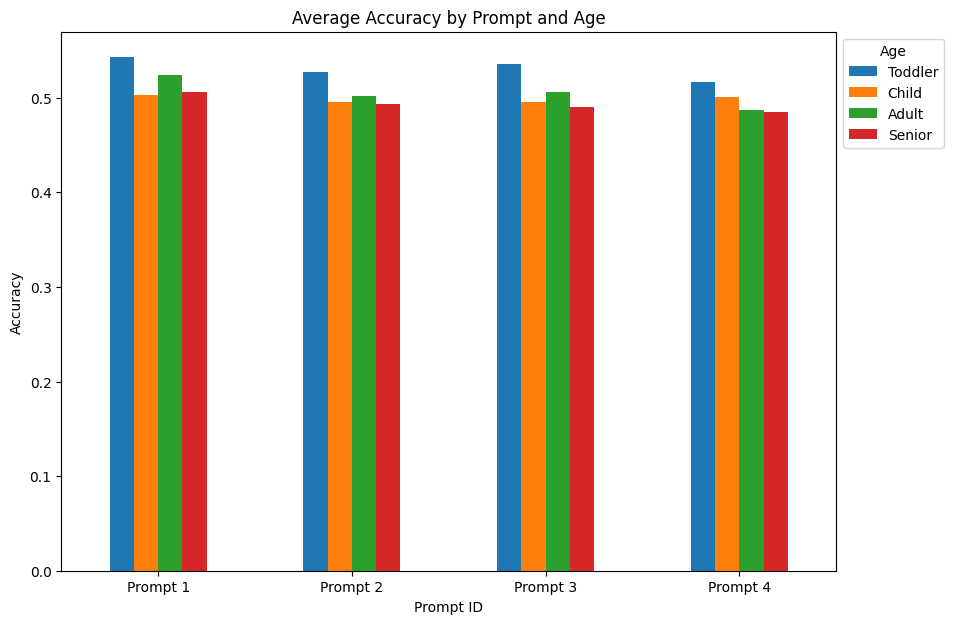

In [ ]:
age_order = ['Toddler', 'Child', 'Adult', 'Senior']
df_full['Age_Category'] = pd.Categorical(df_full['Age_Category'], categories=age_order, ordered=True)

grouped_accuracy = df_full.groupby(['Prompt ID', 'Age_Category'])['correct'].mean().reset_index()
pivot_table = pd.pivot_table(grouped_accuracy, values='correct', index='Prompt ID', columns='Age_Category')


fig, ax = plt.subplots(figsize=(10, 7))
pivot_table.plot(kind='bar', ax=ax)
ax.set_title('Average Accuracy by Prompt and Age')
ax.set_xlabel('Prompt ID')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Age', bbox_to_anchor=(1, 1))
plt.show()

<ipython-input-71-f7ed75bddad1>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped = df_full.groupby(['Prompt ID', 'Age_Category'])['correct']
<ipython-input-71-f7ed75bddad1>:15: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  mean_pivot = pd.pivot_table(mean_accuracy, values='mean_correct', index='Prompt ID', columns='Age_Category')
<ipython-input-71-f7ed75bddad1>:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  sem_pivot = pd.pivot_table(sem_accuracy, values='sem_corr

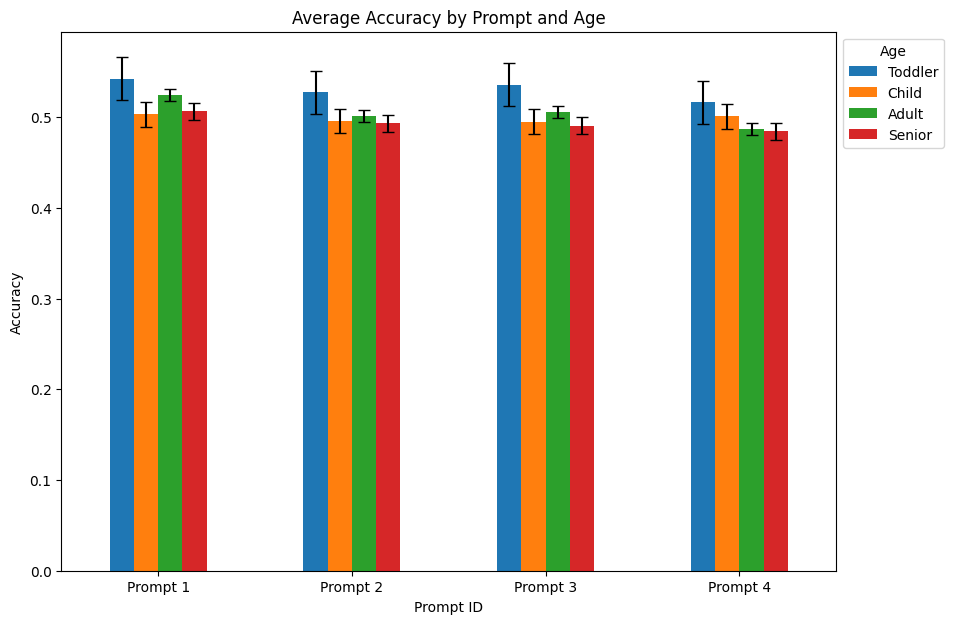

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

age_order = ['Toddler', 'Child', 'Adult', 'Senior']
df_full['Age_Category'] = pd.Categorical(df_full['Age_Category'], categories=age_order, ordered=True)

grouped = df_full.groupby(['Prompt ID', 'Age_Category'])['correct']
mean_accuracy = grouped.mean().reset_index(name='mean_correct')
sem_accuracy = grouped.sem().reset_index(name='sem_correct')

mean_pivot = pd.pivot_table(mean_accuracy, values='mean_correct', index='Prompt ID', columns='Age_Category')
sem_pivot = pd.pivot_table(sem_accuracy, values='sem_correct', index='Prompt ID', columns='Age_Category')

fig, ax = plt.subplots(figsize=(10, 7))
mean_pivot.plot(kind='bar', yerr=sem_pivot, ax=ax, capsize=4)
ax.set_title('Average Accuracy by Prompt and Age')
ax.set_xlabel('Prompt ID')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Age', bbox_to_anchor=(1, 1))
plt.show()


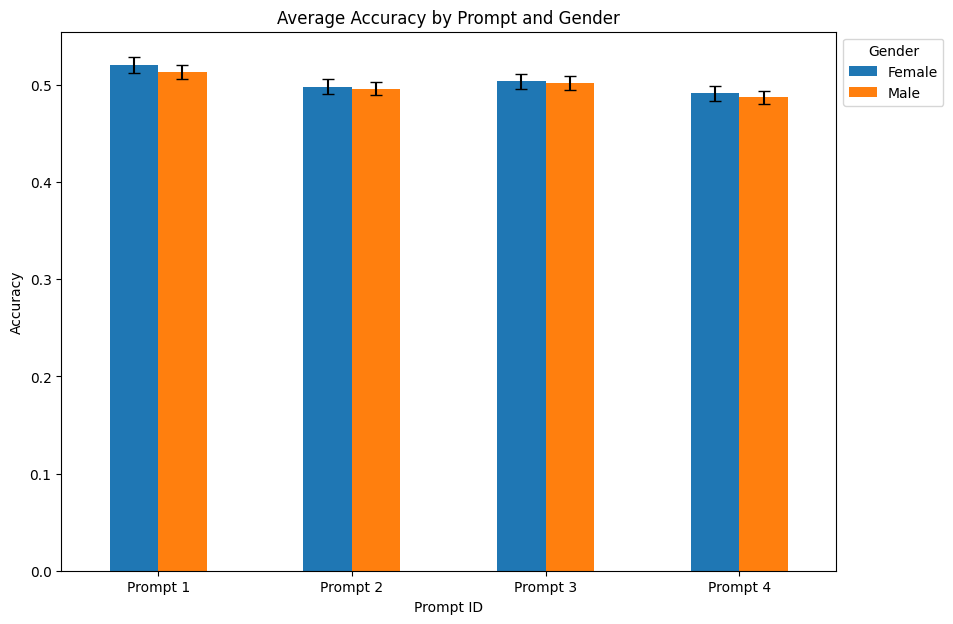

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

grouped = df_full.groupby(['Prompt ID', 'Gender'])['correct']
mean_accuracy = grouped.mean().reset_index(name='mean_correct')
sem_accuracy = grouped.sem().reset_index(name='sem_correct')

mean_pivot = pd.pivot_table(mean_accuracy, values='mean_correct', index='Prompt ID', columns='Gender')
sem_pivot = pd.pivot_table(sem_accuracy, values='sem_correct', index='Prompt ID', columns='Gender')

fig, ax = plt.subplots(figsize=(10, 7))
mean_pivot.plot(kind='bar', yerr=sem_pivot, ax=ax, capsize=4)
ax.set_title('Average Accuracy by Prompt and Gender')
ax.set_xlabel('Prompt ID')
ax.set_ylabel('Accuracy')
plt.xticks(rotation=0)
plt.legend(title='Gender', bbox_to_anchor=(1, 1))
plt.show()


<Axes: xlabel='Age', ylabel='Count'>

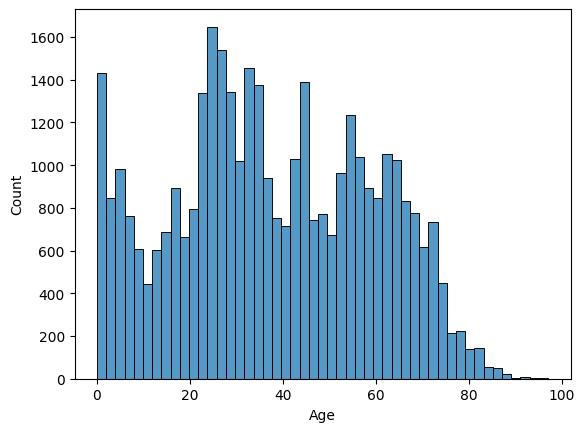

In [ ]:
import seaborn as sns
sns.histplot(df_full.Age)

In [ ]:
# Statistical Tests for Gender Comparison within Each Prompt
print("\n--- Statistical Tests for Gender Comparison within Each Prompt ---")
gender_results_within_prompt = {}


for prompt in df_full['Prompt ID'].unique():
    print(f"\n--- Analyzing Gender Comparison for {prompt} ---")

    prompt_data = df_full[df_full['Prompt ID'] == prompt]

    if prompt_data['Gender'].nunique() < 2:
        print(f"Not enough data for gender comparison in {prompt}. Skipping...")
        continue

    male_data = prompt_data[prompt_data['Gender'] == 'Male']['correct']
    female_data = prompt_data[prompt_data['Gender'] == 'Female']['correct']

    ttest_result = stats.ttest_ind(male_data, female_data)
    p_value = ttest_result.pvalue
    test_type = "T-test"
    gender_results_within_prompt[prompt] = p_value

    if p_value < 0.05:
        print(f"{test_type} for {prompt}: Significant difference (p-value = {p_value:.4f})")
    else:
        print(f"{test_type} for {prompt}: No significant difference (p-value = {p_value:.4f})")


print("\n--- Statistical Test for Gender Comparison Across All Prompts ---")
male_data_all_prompts = df_full[df_full['Gender'] == 'Male']['correct']
female_data_all_prompts = df_full[df_full['Gender'] == 'Female']['correct']

ttest_result_all = stats.ttest_ind(male_data_all_prompts, female_data_all_prompts)
p_value_all = ttest_result_all.pvalue
test_type_all = "T-test"

print(f"{test_type_all} test across all prompts: p-value = {p_value_all:.4f}")

if p_value_all < 0.05:
    print(f"Significant difference in accuracy between Male and Female across all prompts (p-value = {p_value_all:.4f})")
else:
    print(f"No significant difference in accuracy between Male and Female across all prompts (p-value = {p_value_all:.4f})")

print("\nSummary of p-values for Gender Comparison Within Each Prompt:")
for prompt, p_val in gender_results_within_prompt.items():
    print(f"{prompt}: p-value = {p_val:.4f}")

In [ ]:
#Statistical Test for Male and Female Comparison Across Prompts
grouped_accuracy = df_full.groupby(['Prompt ID', 'Gender'])['correct'].mean().reset_index()

print("\n--- Statistical Test for Male Comparison Across Prompts ---")
male_data = df_full[df_full['Gender'] == 'Male']
male_data_by_prompt = [male_data[male_data['Prompt ID'] == prompt]['correct'] for prompt in male_data['Prompt ID'].unique()]

if all(stats.shapiro(data)[1] > 0.05 for data in male_data_by_prompt):
    anova_result_male = stats.f_oneway(*male_data_by_prompt)
    p_value_male = anova_result_male.pvalue
    test_type_male = "ANOVA"
else:
    kruskal_result_male = stats.kruskal(*male_data_by_prompt)
    p_value_male = kruskal_result_male.pvalue
    test_type_male = "Kruskal-Wallis"

print(f"{test_type_male} test for Male across prompts: p-value = {p_value_male:.4f}")

if p_value_male < 0.05:
    print(f"Significant difference in accuracy for Male across the prompts (p-value = {p_value_male:.4f})")
else:
    print(f"No significant difference in accuracy for Male across the prompts (p-value = {p_value_male:.4f})")

print("\n--- Statistical Test for Female Comparison Across Prompts ---")
female_data = df_full[df_full['Gender'] == 'Female']

female_data_by_prompt = [female_data[female_data['Prompt ID'] == prompt]['correct'] for prompt in female_data['Prompt ID'].unique()]

if all(stats.shapiro(data)[1] > 0.05 for data in female_data_by_prompt):
    # If data is normally distributed, use ANOVA
    anova_result_female = stats.f_oneway(*female_data_by_prompt)
    p_value_female = anova_result_female.pvalue
    test_type_female = "ANOVA"
else:
    # Use Kruskal-Wallis if normality is not assumed
    kruskal_result_female = stats.kruskal(*female_data_by_prompt)
    p_value_female = kruskal_result_female.pvalue
    test_type_female = "Kruskal-Wallis"

print(f"{test_type_female} test for Female across prompts: p-value = {p_value_female:.4f}")

if p_value_female < 0.05:
    print(f"Significant difference in accuracy for Female across the prompts (p-value = {p_value_female:.4f})")
else:
    print(f"No significant difference in accuracy for Female across the prompts (p-value = {p_value_female:.4f})")


In [ ]:
#ANOVA test within each prompt
results = {}
for prompt in df_full['Prompt ID'].unique():
    prompt_data = df_full[df_full['Prompt ID'] == prompt]

    model = ols('correct ~ C(Age_Category)', data=prompt_data).fit()
    anova_table = sm.stats.anova_lm(model, typ=2)

    print(f"\nANOVA Results for {prompt}:")
    print(anova_table)

    p_value = anova_table['PR(>F)'][0]
    results[prompt] = p_value

    if p_value < 0.05:
        print(f"\nSignificant difference found for {prompt}. Running post-hoc test...\n")
        posthoc = stats.kruskal(*[prompt_data[prompt_data['Age_Category'] == category]['correct']
                                  for category in prompt_data['Age_Category'].unique()])
        print("Kruskal-Wallis Test Result:", posthoc)

print("\nSummary of p-values from ANOVA for each prompt:")
print(results)

In [ ]:
#Analyze the different age groups between the prompts
age_groups = ['Toddler', 'Child', 'Adult', 'Senior']
results = {}

for age_group in age_groups:
    print(f"\n--- Analyzing {age_group} group ---")
    age_group_data = df_full[df_full['Age_Category'] == age_group]

    if len(age_group_data) < 2:
        print(f"Not enough data for {age_group}. Skipping...")
        continue


    prompt_accuracy_data = [age_group_data[age_group_data['Prompt ID'] == prompt]['correct']
                            for prompt in age_group_data['Prompt ID'].unique()]

    # Kruskal-Wallis Test (if data is not normally distributed) or ANOVA (if data is normally distributed)
    if stats.shapiro(age_group_data['correct'])[1] > 0.05:  # Normality Test
        # One-Way ANOVA if data is normally distributed
        anova_result = stats.f_oneway(*prompt_accuracy_data)
        p_value = anova_result.pvalue
        test_type = "ANOVA"
    else:
        # Kruskal-Wallis test if data is not normally distributed
        kruskal_result = stats.kruskal(*prompt_accuracy_data)
        p_value = kruskal_result.pvalue
        test_type = "Kruskal-Wallis"

    print(f"{test_type} Test for {age_group}: p-value = {p_value:.4f}")

    results[age_group] = p_value

    # Interpretation
    if p_value < 0.05:
        print(f"Significant difference found in accuracy for {age_group} across prompts (p < 0.05).")
    else:
        print(f"No significant difference found in accuracy for {age_group} across prompts (p >= 0.05).")

print("\nSummary of Statistical Test p-values for each age group:")
for age_group, p_val in results.items():
    print(f"{age_group}: p-value = {p_val:.4f}")